In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn

In [89]:
df = pd.read_csv('total.csv')

In [90]:
df = df.reindex(columns = ['tr_log_testduration', 'tr_log_lan', 'tr_log_num_tests_run','loc', 'tr_log_bool_tests_failed'])

In [91]:
df = df.rename(columns={'tr_log_testduration': 'time', 'tr_log_lan' : 'language', 'tr_log_num_tests_run' : 'test_count', 'tr_log_num_test_suites_run' : "test_suites_count", 'tr_log_bool_tests_failed' : 'status'})


In [92]:
df = df[df['time'].notnull() & df['test_count'].notnull() & df['status'].notnull()]

In [93]:
df.eval('log_test_count = log(test_count)', inplace = True)
df.eval('log_time = log(time)', inplace = True)

In [94]:
df = df[(df['loc'] > 500) & (df['time'] > 1) & (df['test_count'] > 10) & (df['status'] == False)]
df = df[((df["loc"] - df["loc"].mean()).abs() < 3 * df["loc"].std()) & 
        ((df["test_count"] - df["test_count"].mean()).abs() < 3 * df["test_count"].std()) &
       ((df["log_time"] - df["log_time"].mean()).abs() < 3 * df["log_time"].std())]

In [95]:
df = df[(df['language'] == 'java') | (df['language'] == 'ruby') | (df['language'] == 'python')]

In [96]:
df['ruby'] = [1 if df.iloc[i, 1] == 'ruby' else 0 for i in range(len(df))]
df['python'] = [1 if df.iloc[i, 1] == 'python' else 0 for i in range(len(df))]
df['java'] = [1 if df.iloc[i, 1] == 'java' else 0 for i in range(len(df))]

In [97]:
df

,time,language,test_count,loc,status,log_test_count,log_time,ruby,python,java
5,6.63,ruby,858.0,3969,False,6.754604,1.891605,1,0,0
6,4.48,ruby,916.0,4031,False,6.820016,1.499623,1,0,0
11,13.14,ruby,72.0,1478,False,4.276666,2.575661,1,0,0
12,16.43,ruby,76.0,1578,False,4.330733,2.799109,1,0,0
15,12.96,ruby,72.0,1425,False,4.276666,2.561868,1,0,0
...,...,...,...,...,...,...,...,...,...,...
31178,27.90,python,196.0,11931,False,5.278115,3.328627,0,1,0
31180,25.35,python,220.0,13530,False,5.393628,3.232779,0,1,0
31181,57.58,python,257.0,13793,False,5.549076,4.053175,0,1,0
31207,31.31,python,771.0,51267,False,6.647688,3.443938,0,1,0


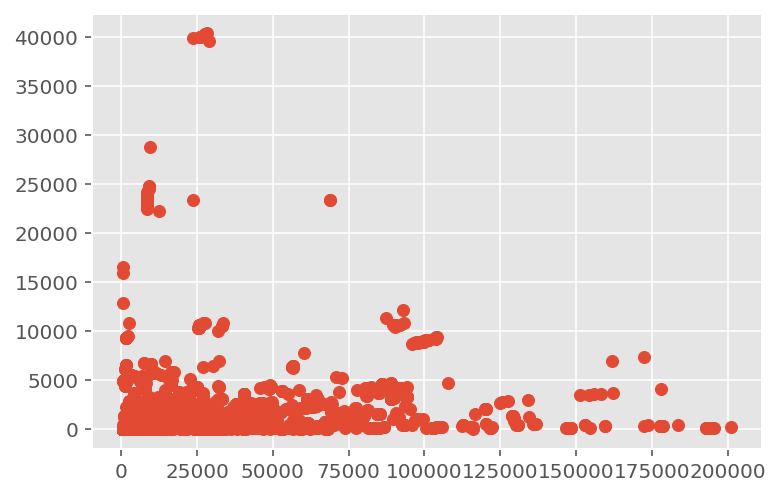

In [98]:
plt.scatter(df['loc'],df['test_count']) 

In [101]:
y = (df['log_time'])
X = df.iloc[:,[3,5,7,9]]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               log_time   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     301.6
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.54e-242
Time:                        00:40:11   Log-Likelihood:                -15334.
No. Observations:                8157   AIC:                         3.068e+04
Df Residuals:                    8152   BIC:                         3.071e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6875      0.067     25.